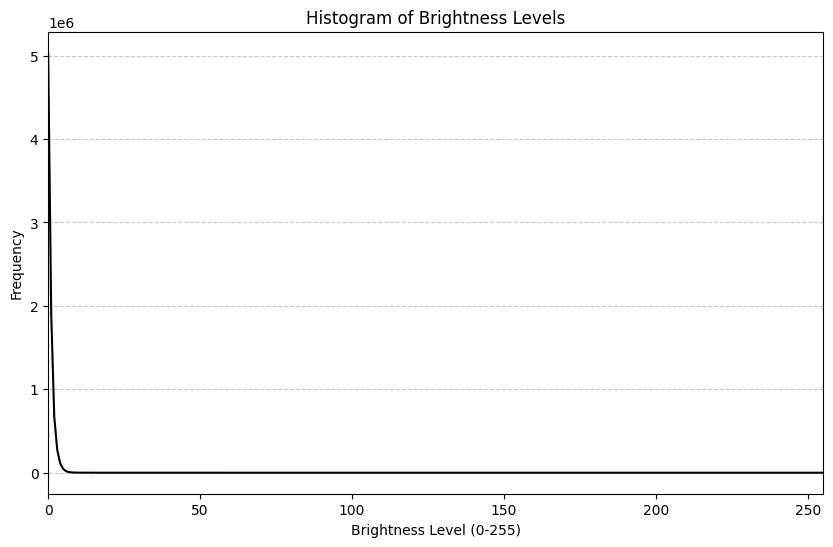

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "run-all/image_15.jpg"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Compute the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.title("Histogram of Brightness Levels")
plt.xlabel("Brightness Level (0-255)")
plt.ylabel("Frequency")
plt.plot(histogram, color='black')
plt.xlim([0, 255])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [2]:
import os
import numpy as np
np.save(os.path.join("run-all", "star_map_size_squared.npy"), 216442004)

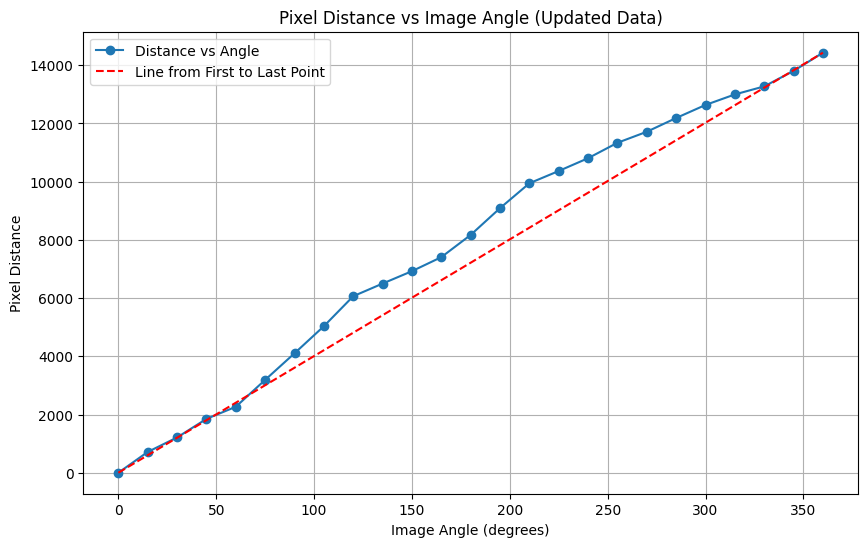

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data
# px_distance_current = np.sqrt([
#     0, 562472, 2494993, 6372781, 5499289, 18422881, 27668042, 34875985, 
#     42758498, 56887424, 83842433, 98536913, 115481306, 139610120, 156694333, 
#     181529842, 199117393, 232701313, 249951860, 271222276, 288971945, 
#     304254185, 344137352
# ])
# image_angles = [345, 330, 315, 300, 285, 270, 255, 240, 225, 210, 195, 180, 150, 135, 120, 105, 90, 75, 60, 45, 30, 15, 0]


px_distance_current = np.sqrt([0, 510580, 1467016, 3422329, 5132833, 10174932, 16834408, 25334608, 36768474, 42224285, 47945378, 54841960, 66727946, 82606628, 98874068, 107453362, 116751002, 128482345, 137208530, 148499585, 159628410, 168895946, 176163145, 190526653, 208197197])
image_angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360]

# Plot with updated data and connecting line
plt.figure(figsize=(10, 6))
plt.plot(image_angles, px_distance_current, marker='o', label="Distance vs Angle")
plt.plot([image_angles[0], image_angles[-1]], 
         [px_distance_current[0], px_distance_current[-1]], 
         linestyle='--', color='red', label="Line from First to Last Point")

# Labels and Title
plt.xlabel("Image Angle (degrees)")
plt.ylabel("Pixel Distance")
plt.title("Pixel Distance vs Image Angle (Updated Data)")
plt.grid(True)
plt.legend()

# Show plot
plt.show()


In [3]:
import extractDescpriptors

extractDescpriptors.analyse("star_data/image_75.jpg", ".", True)

[[-182.22223 -180.86446 -179.5072  ... 3458.1504  3459.5073  3460.8645 ]
 [-182.22223 -180.86446 -179.5072  ... 3458.1504  3459.5073  3460.8645 ]
 [-182.22223 -180.86446 -179.5072  ... 3458.1504  3459.5073  3460.8645 ]
 ...
 [-182.22223 -180.86446 -179.5072  ... 3458.1504  3459.5073  3460.8645 ]
 [-182.22223 -180.86446 -179.5072  ... 3458.1504  3459.5073  3460.8645 ]
 [-182.22223 -180.86446 -179.5072  ... 3458.1504  3459.5073  3460.8645 ]]
INFO: Using remapping
descriptors: 22


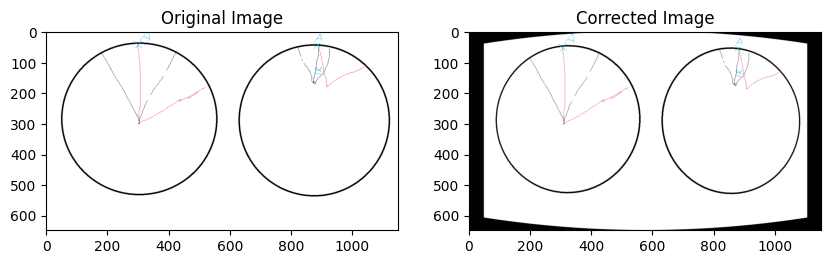

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Simulated distortion correction function
def correct_distortion(image, x_distortion_strength=0.1, y_distortion_strength=0.1):
    """
    Correct the X-direction and Y-direction distortion in an image.
    - X-direction distortion correction makes the edges of the image appear further away.
    - Y-direction distortion correction increases the Y-coordinate near the top and bottom edges.
    
    :param image: Input image (2D or 3D numpy array)
    :param x_distortion_strength: Strength of the X distortion to correct.
    :param y_distortion_strength: Strength of the Y distortion to correct.
    :return: Corrected image.
    """
    h, w = image.shape[:2]
    
    # Create mapping arrays for x and y
    map_x = np.zeros((h, w), dtype=np.float32)
    map_y = np.zeros((h, w), dtype=np.float32)
    
    # Fill in the mapping arrays
    for i in range(h):
        for j in range(w):
            # Distorted X-coordinate
            x = j / w * 2 - 1  # Normalize to range [-1, 1]
            corrected_x = x / (1 + x_distortion_strength * x**2)
            map_x[i, j] = (corrected_x + 1) * w / 2  # Map back to pixel coordinates
            
            # Distorted Y-coordinate
            y = i / h * 2 - 1  # Normalize to range [-1, 1]
            # y = 1 -abs(x)
            corrected_y = y / (1 + y_distortion_strength * x**2)  # Stretch near the borders
            map_y[i, j] = (corrected_y + 1) * h / 2  # Map back to pixel coordinates

    # Apply remapping
    # np.save("map_x.npy", map_x)
    # np.save("map_y.npy", map_y)
    corrected_image = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR)
    return corrected_image

# Load an example image (or replace with your data)
image = cv2.imread("Untitled.png")  # Replace with your image path
corrected_image = correct_distortion(image, x_distortion_strength=-0.1, y_distortion_strength=-0.15)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("Corrected Image")
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.show()
